# Experiment - 10
# Project on Skin Cancer Detection

### Importing the required libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

#### Accessing the images from the directory: Benign, Malignant

In [2]:
DATADIR = '/Users/dexter/Desktop/D-GALLOS/CODES/PYTHON/FIles/Skin_Cancer_Dataset/DATA2' 
CATEGORIES = ['benign','malignant']

In [3]:
# Reading, Resizing, Flattening, Gray
# Orignal image size was 225x225 - we have converted that into 200x200 in 2 - Dimension

label = []
train_data = []

def create_training_data():
    for category in CATEGORIES:
        class_num=CATEGORIES.index(category) 
        path=os.path.join(DATADIR,category) 
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img)) 
            img_resized=resize(img_array,(30,30,3)) 
            img_black = np.mean(img_resized, axis=2) #Standardising the values too
            train_data.append(img_black.flatten())
            label.append(class_num)
create_training_data()
train_data=np.array(train_data)
label=np.array(label)

### Exploratory Data Analysis

In [4]:
# This is our label array in correspondance with each image
# Showing the particular image came from which type
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [5]:
# This is the lenght of our data variables/ Pixels 
train_data

array([[0.77247785, 0.77254902, 0.76862745, ..., 0.73442266, 0.73594771,
        0.72586638],
       [0.72102977, 0.72600871, 0.73093682, ..., 0.70623094, 0.68849237,
        0.68204793],
       [0.63459695, 0.6188671 , 0.58239651, ..., 0.64095861, 0.58152505,
        0.44277705],
       ...,
       [0.49163399, 0.53233551, 0.54018155, ..., 0.40570806, 0.38505011,
        0.36538707],
       [0.47777778, 0.59681481, 0.66434277, ..., 0.55937545, 0.48208715,
        0.35429194],
       [0.71087727, 0.70959477, 0.70801743, ..., 0.68954248, 0.67572985,
        0.6698199 ]])

In [6]:
# This is our data in array format/ images in array format
x=pd.DataFrame(train_data)
y=pd.DataFrame(label)

In [7]:
x

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,0.772478,0.772549,0.768627,0.769935,0.774584,0.781830,0.782025,0.775861,0.775153,0.772244,...,0.744834,0.756273,0.754902,0.737037,0.738694,0.741176,0.728677,0.734423,0.735948,0.725866
1,0.721030,0.726009,0.730937,0.739278,0.747813,0.753508,0.729368,0.743442,0.761012,0.757910,...,0.736819,0.734641,0.707342,0.680687,0.666972,0.704257,0.717535,0.706231,0.688492,0.682048
2,0.634597,0.618867,0.582397,0.575300,0.528092,0.605839,0.674379,0.719063,0.735948,0.736555,...,0.751200,0.747692,0.734641,0.713823,0.699085,0.689847,0.666057,0.640959,0.581525,0.442777
3,0.702876,0.725621,0.750407,0.762054,0.762092,0.777952,0.779065,0.776471,0.780979,0.786318,...,0.751634,0.742484,0.735294,0.725795,0.723920,0.730444,0.724818,0.720370,0.713155,0.697037
4,0.673436,0.687098,0.695643,0.712829,0.716632,0.704398,0.691537,0.701656,0.708443,0.717647,...,0.689021,0.687277,0.687582,0.687625,0.678999,0.677124,0.674360,0.665323,0.660436,0.657821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.378071,0.409490,0.440646,0.476296,0.502052,0.514466,0.513659,0.516950,0.525544,0.526228,...,0.538909,0.532549,0.520370,0.515043,0.517691,0.499638,0.473402,0.428453,0.374331,0.300317
656,0.465506,0.489808,0.501394,0.507146,0.490763,0.506318,0.555633,0.583159,0.580731,0.595425,...,0.583445,0.572428,0.527407,0.518039,0.518125,0.490980,0.447059,0.447887,0.430105,0.399679
657,0.491634,0.532336,0.540182,0.591373,0.631765,0.653640,0.682755,0.698845,0.723583,0.714728,...,0.494684,0.506667,0.489935,0.463553,0.407887,0.385621,0.394423,0.405708,0.385050,0.365387
658,0.477778,0.596815,0.664343,0.688161,0.689965,0.682092,0.717147,0.738519,0.738911,0.735380,...,0.681044,0.702702,0.706885,0.694510,0.680652,0.667059,0.623728,0.559375,0.482087,0.354292


In [8]:
#Assigning th Independent and Dependent variables

dataset = x

dataset['label'] = y

dataset

,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,label
0,0.772478,0.772549,0.768627,0.769935,0.774584,0.781830,0.782025,0.775861,0.775153,0.772244,...,0.756273,0.754902,0.737037,0.738694,0.741176,0.728677,0.734423,0.735948,0.725866,0
1,0.721030,0.726009,0.730937,0.739278,0.747813,0.753508,0.729368,0.743442,0.761012,0.757910,...,0.734641,0.707342,0.680687,0.666972,0.704257,0.717535,0.706231,0.688492,0.682048,0
2,0.634597,0.618867,0.582397,0.575300,0.528092,0.605839,0.674379,0.719063,0.735948,0.736555,...,0.747692,0.734641,0.713823,0.699085,0.689847,0.666057,0.640959,0.581525,0.442777,0
3,0.702876,0.725621,0.750407,0.762054,0.762092,0.777952,0.779065,0.776471,0.780979,0.786318,...,0.742484,0.735294,0.725795,0.723920,0.730444,0.724818,0.720370,0.713155,0.697037,0
4,0.673436,0.687098,0.695643,0.712829,0.716632,0.704398,0.691537,0.701656,0.708443,0.717647,...,0.687277,0.687582,0.687625,0.678999,0.677124,0.674360,0.665323,0.660436,0.657821,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.378071,0.409490,0.440646,0.476296,0.502052,0.514466,0.513659,0.516950,0.525544,0.526228,...,0.532549,0.520370,0.515043,0.517691,0.499638,0.473402,0.428453,0.374331,0.300317,1
656,0.465506,0.489808,0.501394,0.507146,0.490763,0.506318,0.555633,0.583159,0.580731,0.595425,...,0.572428,0.527407,0.518039,0.518125,0.490980,0.447059,0.447887,0.430105,0.399679,1
657,0.491634,0.532336,0.540182,0.591373,0.631765,0.653640,0.682755,0.698845,0.723583,0.714728,...,0.506667,0.489935,0.463553,0.407887,0.385621,0.394423,0.405708,0.385050,0.365387,1
658,0.477778,0.596815,0.664343,0.688161,0.689965,0.682092,0.717147,0.738519,0.738911,0.735380,...,0.702702,0.706885,0.694510,0.680652,0.667059,0.623728,0.559375,0.482087,0.354292,1


## Converting our dataset to CSV file

In [9]:
dataset.to_csv('dataset.csv',index=False)

In [10]:
data1 = pd.read_csv('/Users/dexter/Desktop/D-GALLOS/CODES/PYTHON/Jupyter/Skin-Cancer-Project/dataset.csv')

In [11]:
data1

,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,label
0,0.772478,0.772549,0.768627,0.769935,0.774584,0.781830,0.782025,0.775861,0.775153,0.772244,...,0.756273,0.754902,0.737037,0.738694,0.741176,0.728677,0.734423,0.735948,0.725866,0
1,0.721030,0.726009,0.730937,0.739278,0.747813,0.753508,0.729368,0.743442,0.761012,0.757910,...,0.734641,0.707342,0.680687,0.666972,0.704257,0.717535,0.706231,0.688492,0.682048,0
2,0.634597,0.618867,0.582397,0.575300,0.528092,0.605839,0.674379,0.719063,0.735948,0.736555,...,0.747692,0.734641,0.713823,0.699085,0.689847,0.666057,0.640959,0.581525,0.442777,0
3,0.702876,0.725621,0.750407,0.762054,0.762092,0.777952,0.779065,0.776471,0.780979,0.786318,...,0.742484,0.735294,0.725795,0.723920,0.730444,0.724818,0.720370,0.713155,0.697037,0
4,0.673436,0.687098,0.695643,0.712829,0.716632,0.704398,0.691537,0.701656,0.708443,0.717647,...,0.687277,0.687582,0.687625,0.678999,0.677124,0.674360,0.665323,0.660436,0.657821,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.378071,0.409490,0.440646,0.476296,0.502052,0.514466,0.513659,0.516950,0.525544,0.526228,...,0.532549,0.520370,0.515043,0.517691,0.499638,0.473402,0.428453,0.374331,0.300317,1
656,0.465506,0.489808,0.501394,0.507146,0.490763,0.506318,0.555633,0.583159,0.580731,0.595425,...,0.572428,0.527407,0.518039,0.518125,0.490980,0.447059,0.447887,0.430105,0.399679,1
657,0.491634,0.532336,0.540182,0.591373,0.631765,0.653640,0.682755,0.698845,0.723583,0.714728,...,0.506667,0.489935,0.463553,0.407887,0.385621,0.394423,0.405708,0.385050,0.365387,1
658,0.477778,0.596815,0.664343,0.688161,0.689965,0.682092,0.717147,0.738519,0.738911,0.735380,...,0.702702,0.706885,0.694510,0.680652,0.667059,0.623728,0.559375,0.482087,0.354292,1


In [12]:
data2 = data1.drop(labels=['label'], axis=1)
data2.info

<bound method DataFrame.info of             0         1         2         3         4         5         6  \
0    0.772478  0.772549  0.768627  0.769935  0.774584  0.781830  0.782025   
1    0.721030  0.726009  0.730937  0.739278  0.747813  0.753508  0.729368   
2    0.634597  0.618867  0.582397  0.575300  0.528092  0.605839  0.674379   
3    0.702876  0.725621  0.750407  0.762054  0.762092  0.777952  0.779065   
4    0.673436  0.687098  0.695643  0.712829  0.716632  0.704398  0.691537   
..        ...       ...       ...       ...       ...       ...       ...   
655  0.378071  0.409490  0.440646  0.476296  0.502052  0.514466  0.513659   
656  0.465506  0.489808  0.501394  0.507146  0.490763  0.506318  0.555633   
657  0.491634  0.532336  0.540182  0.591373  0.631765  0.653640  0.682755   
658  0.477778  0.596815  0.664343  0.688161  0.689965  0.682092  0.717147   
659  0.710877  0.709595  0.708017  0.706032  0.700523  0.695425  0.704662   

            7         8         9  ...     

#### Converting our array data into Numpy array

In [13]:
data_np = np.array(data2)

# Displaying the Numpy Array data
print(data_np[0])

# Displaying the Rows of our Numpy Array
print("\nDimension of Numpy Array - ",data_np[0].shape)

[0.77247785 0.77254902 0.76862745 0.76993464 0.77458388 0.78183007
 0.78202469 0.77586057 0.77515323 0.77224401 0.76583878 0.75335221
 0.7330719  0.70910675 0.6936703  0.6827451  0.66814379 0.60819172
 0.64560203 0.6837342  0.71476979 0.73550182 0.76167756 0.76830211
 0.76862745 0.7795817  0.77986347 0.78045025 0.78793028 0.77570225
 0.77385621 0.77254902 0.76923747 0.76379085 0.76509804 0.76379085
 0.76640523 0.76816993 0.76732026 0.76413943 0.75437908 0.73031373
 0.68947712 0.65346405 0.64118083 0.64762963 0.65175163 0.60995643
 0.60286275 0.62810458 0.66901961 0.71154684 0.73169935 0.75010893
 0.75895861 0.76618301 0.76287582 0.76947712 0.77777778 0.76069281
 0.77302106 0.77254902 0.76412491 0.76801017 0.76472767 0.76670298
 0.76339869 0.76535948 0.77119826 0.76357298 0.74294118 0.70275236
 0.63809005 0.61261438 0.6163907  0.62323166 0.61810458 0.60094408
 0.59511983 0.60599129 0.61141612 0.62792302 0.67712418 0.73381264
 0.75151053 0.7540305  0.75603486 0.76670298 0.77124183 0.7571

<Figure size 432x288 with 0 Axes>

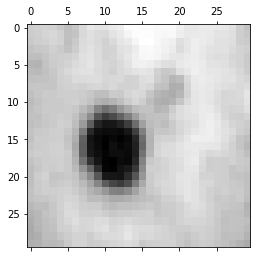

In [14]:
# This function sets up the matplotlib to work interactively. 
# It lets you activate the matplotlib interactive support anywhere in an IPython session
%matplotlib inline
plt.gray()

# Here is the 300th image
plt.matshow(data_np[300].reshape(30,30))

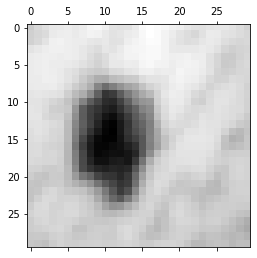

In [15]:
# Here is the 90th image
plt.matshow(data_np[90].reshape(30,30))

In [16]:
data_np[90].reshape(30,30)

array([[0.66973275, 0.6972549 , 0.71276688, 0.72897023, 0.73105447,
        0.73869426, 0.72970661, 0.73821351, 0.75581699, 0.75991285,
        0.74535948, 0.72213508, 0.71428468, 0.71794771, 0.73510385,
        0.7669281 , 0.77455338, 0.76893972, 0.76189833, 0.75069281,
        0.74318083, 0.7277894 , 0.71688453, 0.71611184, 0.72317938,
        0.7282658 , 0.72762527, 0.72131445, 0.70518954, 0.68842556],
       [0.68025708, 0.69138562, 0.70189542, 0.73387364, 0.73986928,
        0.74095425, 0.73332026, 0.74294118, 0.7524488 , 0.74724183,
        0.73141176, 0.71633987, 0.72357298, 0.73670588, 0.74288017,
        0.76270153, 0.77805229, 0.7687146 , 0.75414379, 0.73878431,
        0.72057952, 0.70701525, 0.69496732, 0.7144793 , 0.73503704,
        0.73381699, 0.72196078, 0.7159695 , 0.70405229, 0.69442266],
       [0.68300654, 0.69605664, 0.72073348, 0.74566449, 0.75021786,
        0.74124909, 0.73856209, 0.7369281 , 0.72771968, 0.72369644,
        0.72973856, 0.71473493, 0.71739288, 0.

In [17]:
img90 = pd.DataFrame(data_np[90].reshape(30,30))

img90.to_csv('image90.csv',index=False)

img90 = pd.read_csv('/Users/dexter/Desktop/D-GALLOS/CODES/PYTHON/Jupyter/Skin-Cancer-Project/image90.csv')

img90

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.669733,0.697255,0.712767,0.728970,0.731054,0.738694,0.729707,0.738214,0.755817,0.759913,...,0.743181,0.727789,0.716885,0.716112,0.723179,0.728266,0.727625,0.721314,0.705190,0.688426
1,0.680257,0.691386,0.701895,0.733874,0.739869,0.740954,0.733320,0.742941,0.752449,0.747242,...,0.720580,0.707015,0.694967,0.714479,0.735037,0.733817,0.721961,0.715969,0.704052,0.694423
2,0.683007,0.696057,0.720733,0.745664,0.750218,0.741249,0.738562,0.736928,0.727720,0.723696,...,0.717647,0.707843,0.710240,0.725839,0.734423,0.726841,0.708257,0.698003,0.692658,0.696347
3,0.719763,0.729033,0.739208,0.746229,0.746405,0.742842,0.737211,0.727691,0.715092,0.705359,...,0.729760,0.729760,0.730414,0.735468,0.729412,0.714946,0.690196,0.677603,0.685752,0.689829
4,0.736078,0.740784,0.743791,0.741608,0.738314,0.742427,0.737168,0.726863,0.707277,0.689399,...,0.745329,0.750375,0.739935,0.739913,0.715891,0.691647,0.670279,0.667538,0.685098,0.694815
5,0.735643,0.740614,0.744662,0.737255,0.737691,0.732914,0.727127,0.716078,0.700062,0.683165,...,0.748873,0.754036,0.747800,0.740629,0.715060,0.692431,0.667907,0.672672,0.691207,0.699041
6,0.735904,0.739856,0.744670,0.739869,0.733159,0.720049,0.709673,0.686209,0.673070,0.664687,...,0.756863,0.749017,0.746340,0.735949,0.716471,0.686789,0.675049,0.681133,0.691503,0.695425
7,0.736449,0.736013,0.743682,0.742484,0.734314,0.720087,0.700566,0.667320,0.637974,0.609869,...,0.754248,0.743115,0.739216,0.724946,0.699237,0.683137,0.688954,0.703268,0.698497,0.692810
8,0.733038,0.735556,0.736202,0.738269,0.726414,0.705054,0.673246,0.648519,0.612115,0.526661,...,0.745733,0.733293,0.726231,0.708715,0.685166,0.699168,0.706793,0.713725,0.702440,0.683999
9,0.722442,0.728279,0.723304,0.719129,0.712331,0.678824,0.636290,0.607712,0.542397,0.453290,...,0.736835,0.725341,0.701569,0.687756,0.700800,0.714858,0.718006,0.712418,0.701176,0.685405


### Converting Numpy array to Dataframe

In [18]:
df = pd.DataFrame(data_np)

# Here is the first 5 rows of our Dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,0.772478,0.772549,0.768627,0.769935,0.774584,0.781830,0.782025,0.775861,0.775153,0.772244,...,0.744834,0.756273,0.754902,0.737037,0.738694,0.741176,0.728677,0.734423,0.735948,0.725866
1,0.721030,0.726009,0.730937,0.739278,0.747813,0.753508,0.729368,0.743442,0.761012,0.757910,...,0.736819,0.734641,0.707342,0.680687,0.666972,0.704257,0.717535,0.706231,0.688492,0.682048
2,0.634597,0.618867,0.582397,0.575300,0.528092,0.605839,0.674379,0.719063,0.735948,0.736555,...,0.751200,0.747692,0.734641,0.713823,0.699085,0.689847,0.666057,0.640959,0.581525,0.442777
3,0.702876,0.725621,0.750407,0.762054,0.762092,0.777952,0.779065,0.776471,0.780979,0.786318,...,0.751634,0.742484,0.735294,0.725795,0.723920,0.730444,0.724818,0.720370,0.713155,0.697037
4,0.673436,0.687098,0.695643,0.712829,0.716632,0.704398,0.691537,0.701656,0.708443,0.717647,...,0.689021,0.687277,0.687582,0.687625,0.678999,0.677124,0.674360,0.665323,0.660436,0.657821


In [19]:
# Here is the Description of our Dataframe
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,...,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,0.583974,0.609440,0.627918,0.640136,0.650647,0.659770,0.665977,0.670592,0.673521,0.675621,...,0.651999,0.650726,0.649848,0.645033,0.638385,0.628263,0.616361,0.599699,0.579486,0.554473
std,0.187072,0.165919,0.150103,0.139049,0.130389,0.122166,0.118552,0.117089,0.116335,0.114404,...,0.114909,0.114456,0.113764,0.115582,0.119100,0.126432,0.138850,0.158247,0.177457,0.196851
min,0.000000,0.000000,0.000051,0.013072,0.022353,0.030372,0.032985,0.032680,0.030055,0.030198,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.508392,0.535505,0.553252,0.570302,0.583173,0.596698,0.598396,0.603611,0.611237,0.614172,...,0.587286,0.588009,0.589847,0.580679,0.569227,0.559235,0.546866,0.530067,0.509085,0.479566
50%,0.631751,0.642022,0.654375,0.663031,0.668336,0.670238,0.677386,0.680185,0.683459,0.689172,...,0.661853,0.658845,0.659303,0.655408,0.651853,0.645556,0.639869,0.628758,0.620046,0.611174
75%,0.705922,0.719706,0.726607,0.730588,0.735644,0.738334,0.741261,0.746068,0.748995,0.750871,...,0.722952,0.720640,0.724913,0.719234,0.715249,0.708150,0.703767,0.703322,0.692504,0.684794
max,0.907190,0.920170,0.921569,0.924799,0.914566,0.907757,0.911493,0.912070,0.921438,0.955513,...,0.971458,0.961535,0.959020,0.915666,0.927409,0.972488,0.963187,0.959818,0.920784,0.901656


In [20]:
# Here is information about rows and columns in our Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Columns: 900 entries, 0 to 899
dtypes: float64(900)
memory usage: 4.5 MB


In [21]:
df.mean(axis=0)

0      0.583974
1      0.609440
2      0.627918
3      0.640136
4      0.650647
         ...   
895    0.628263
896    0.616361
897    0.599699
898    0.579486
899    0.554473
Length: 900, dtype: float64

In [22]:
df.std(axis=0)

0      0.187072
1      0.165919
2      0.150103
3      0.139049
4      0.130389
         ...   
895    0.126432
896    0.138850
897    0.158247
898    0.177457
899    0.196851
Length: 900, dtype: float64

### Normalising our Dataframe

Normalize Pixel Values
For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

It is valid for images to have pixel values in the range 0-1 and images can be viewed normally.

This can be achieved by dividing all pixels values by the largest pixel value; that is 255. This is performed across all channels, regardless of the actual range of pixel values that are present in the image.

In [23]:
norm_df=(df-df.min())/(df.max()-df.min())

In [24]:
# This is normalised dataframe with values ranging between 0 and 1
norm_df

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,0.851507,0.839572,0.834033,0.830142,0.843106,0.856474,0.852627,0.845110,0.835890,0.801939,...,0.766717,0.786527,0.787160,0.804919,0.796514,0.762145,0.756527,0.765168,0.799262,0.805037
1,0.794795,0.788994,0.793133,0.796517,0.813101,0.824194,0.792688,0.808245,0.820026,0.786448,...,0.758467,0.764029,0.737568,0.743379,0.719178,0.724181,0.744960,0.735796,0.747724,0.756439
2,0.699520,0.672557,0.631942,0.616663,0.566836,0.655888,0.730095,0.780522,0.791907,0.763369,...,0.773270,0.777602,0.766033,0.779567,0.753804,0.709363,0.691514,0.667792,0.631554,0.491071
3,0.774784,0.788573,0.814261,0.821498,0.829105,0.852054,0.849258,0.845803,0.842426,0.817149,...,0.773717,0.772186,0.766714,0.792642,0.780584,0.751109,0.752521,0.750528,0.774508,0.773063
4,0.742333,0.746708,0.754833,0.767508,0.778153,0.768221,0.749625,0.760727,0.761051,0.742935,...,0.709265,0.714770,0.716963,0.750956,0.732147,0.696280,0.700135,0.693176,0.717253,0.729570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.416750,0.445016,0.478119,0.508074,0.537651,0.551746,0.547148,0.550689,0.555865,0.536066,...,0.554743,0.553853,0.542607,0.562479,0.558212,0.513773,0.491495,0.446390,0.406535,0.333072
656,0.513130,0.532302,0.544041,0.541910,0.524997,0.542460,0.594926,0.625979,0.617777,0.610848,...,0.600587,0.595328,0.549944,0.565751,0.558680,0.504870,0.464146,0.466637,0.467107,0.443272
657,0.541931,0.578519,0.586132,0.634292,0.683034,0.710369,0.739629,0.757531,0.778036,0.739780,...,0.509218,0.526935,0.510870,0.506246,0.439813,0.396530,0.409498,0.422693,0.418176,0.405240
658,0.526657,0.648592,0.720867,0.740451,0.748265,0.742797,0.778778,0.802646,0.795231,0.762099,...,0.701054,0.730812,0.737091,0.758475,0.733929,0.685930,0.647568,0.582793,0.523561,0.392935


In [25]:
# Description of our normalised dataframe
norm_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,...,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,0.643717,0.662313,0.681340,0.687776,0.704197,0.717356,0.720531,0.725403,0.721873,0.697517,...,0.671155,0.676758,0.677617,0.704441,0.688354,0.646037,0.639918,0.624804,0.629340,0.614950
std,0.206211,0.180313,0.162887,0.152511,0.146142,0.139239,0.134946,0.133148,0.130511,0.123638,...,0.118285,0.119035,0.118626,0.126228,0.128423,0.130009,0.144157,0.164872,0.192723,0.218321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.560403,0.581964,0.600315,0.611181,0.628572,0.645470,0.643604,0.649236,0.652000,0.631109,...,0.604541,0.611532,0.615053,0.634160,0.613782,0.575056,0.567767,0.552258,0.552882,0.531873
50%,0.696382,0.697721,0.710051,0.712888,0.724022,0.729288,0.733517,0.736312,0.733023,0.712162,...,0.681298,0.685201,0.687476,0.715772,0.702875,0.663819,0.664325,0.655080,0.673389,0.677835
75%,0.778142,0.782145,0.788434,0.786986,0.799462,0.806899,0.806226,0.811230,0.806545,0.778841,...,0.744193,0.749468,0.755890,0.785477,0.771234,0.728184,0.730666,0.732766,0.752081,0.759485
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Mean for Normalised Data
norm_df.mean(axis=0)

0      0.643717
1      0.662313
2      0.681340
3      0.687776
4      0.704197
         ...   
895    0.646037
896    0.639918
897    0.624804
898    0.629340
899    0.614950
Length: 900, dtype: float64

In [27]:
# Standard Deviation for Normalised Data
norm_df.std(axis=0)

0      0.206211
1      0.180313
2      0.162887
3      0.152511
4      0.146142
         ...   
895    0.130009
896    0.144157
897    0.164872
898    0.192723
899    0.218321
Length: 900, dtype: float64

### Assigning values to our Independent and Dependent Variables, i.e.  X, Y respectively

In [28]:
X = norm_df
y = label

### Preprocessing

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, in scaling, you're changing the range of your data while in normalization you're changing the shape of the distribution of your data

### Scaling our Independant Variable - X

In [29]:
# The preprocessing module provides the StandardScaler utility class, 
# which is a quick and easy way to perform the following operation on an array-like dataset:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.00841848,  0.98380718,  0.93812951, ...,  0.85199723,
         0.88235805,  0.87133739],
       [ 0.73319264,  0.70309419,  0.68684075, ...,  0.67371241,
         0.61473572,  0.64857134],
       [ 0.27081293,  0.05685773, -0.30349841, ...,  0.26092932,
         0.01149813, -0.56784401],
       ...,
       [-0.49397955, -0.4650671 , -0.5849515 , ..., -1.22679824,
        -1.09651385, -0.96128243],
       [-0.56810451, -0.07615307,  0.24284886, ..., -0.25500361,
        -0.54927766, -1.01768834],
       [ 0.67888095,  0.60409168,  0.53403394, ...,  0.56817441,
         0.542762  ,  0.58640596]])

In [30]:
# Mean for Scaled Data
X_scaled.mean(axis=0)

array([-3.22973971e-16,  2.15315981e-16, -7.53605932e-16, -2.15315981e-16,
       -1.72252784e-16, -4.30631961e-17,  3.87568765e-16, -3.22973971e-17,
        8.61263922e-17, -3.01442373e-16,  7.53605932e-17,  7.75137530e-16,
       -4.52163559e-16, -8.18200726e-16, -3.22973971e-17,  1.93784382e-16,
        6.99776937e-16, -4.09100363e-16, -6.45947942e-17,  4.30631961e-16,
       -1.07657990e-16,  8.18200726e-16, -4.30631961e-17,  8.61263922e-17,
        3.44505569e-16, -2.15315981e-16, -8.61263922e-17, -3.44505569e-16,
        8.61263922e-17,  4.30631961e-17,  2.36847579e-16,  0.00000000e+00,
       -3.87568765e-16, -3.55271368e-16, -9.68921912e-17,  2.90676574e-16,
       -5.92118946e-16, -3.44505569e-16,  3.22973971e-17,  2.47613378e-16,
       -3.01442373e-16,  1.39955387e-16, -2.15315981e-17,  3.87568765e-16,
       -3.66037167e-16, -2.15315981e-16, -7.64371731e-16, -1.07657990e-16,
        4.41397760e-16,  2.79910775e-16, -5.05992554e-16,  3.01442373e-16,
       -2.15315981e-17, -

In [31]:
# Standard Deviation for Scaled Data
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

##### An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.

In [32]:
# from sklearn.preprocessing import MinMaxScaler
# min_max_scaler = MinMaxScaler()
# X_minmax = min_max_scaler.fit_transform(X)
# X_minmax

### Splitting the Dataset: Train (80%) and Test (20%) 

In [33]:
# For Scaled Data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

# For Normalised Data
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, y, test_size=0.2, random_state=30)

#### Checking for Accuracy using Logistic Regression

In [34]:
# FOR SCALED DATA
model_1 = LogisticRegression()
model_1.fit(X_train, Y_train)
print("With Scaled Data - ",model_1.score(X_test, Y_test))

# FOR NORMALISED DATA
model_2 = LogisticRegression()
model_2.fit(X_train1, Y_train1)
print("With Normalised Data - ",model_2.score(X_test1, Y_test1))

With Scaled Data -  0.6060606060606061
With Normalised Data -  0.7196969696969697


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### Applying PCA for Dimensionalty Reduction

In [35]:
# Information about our independant variable
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Columns: 900 entries, 0 to 899
dtypes: float64(900)
memory usage: 4.5 MB


principal components remove noise by reducing a large number of features to just a couple of principal components.

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=600)
X_norm_pca = pca.fit_transform(X)
X_scal_pca = pca.fit_transform(X_scaled)

In [37]:
pca.n_components_

600

In [38]:
pca.explained_variance_ratio_

array([4.81292311e-01, 1.73876913e-01, 4.64942877e-02, 3.72512043e-02,
       3.10873974e-02, 2.58693769e-02, 2.03099825e-02, 1.78104322e-02,
       1.64642226e-02, 1.50975227e-02, 9.44433291e-03, 7.88740566e-03,
       7.42254416e-03, 6.84056652e-03, 6.17258777e-03, 5.86154157e-03,
       5.32298355e-03, 3.80276746e-03, 3.44706261e-03, 3.25753128e-03,
       3.24404098e-03, 2.91270638e-03, 2.76310198e-03, 2.72490380e-03,
       2.50742841e-03, 2.18141054e-03, 2.02618805e-03, 1.90603963e-03,
       1.85461846e-03, 1.62028433e-03, 1.53798910e-03, 1.49637807e-03,
       1.45913234e-03, 1.39609104e-03, 1.30956532e-03, 1.27694536e-03,
       1.25589073e-03, 1.21769645e-03, 1.11035693e-03, 1.07504999e-03,
       9.88536979e-04, 9.28592213e-04, 8.65907565e-04, 8.38752861e-04,
       8.17808816e-04, 7.68910267e-04, 7.43785972e-04, 7.30805875e-04,
       7.15396848e-04, 6.71780563e-04, 6.65126997e-04, 6.41459082e-04,
       6.18237205e-04, 5.91175063e-04, 5.90781720e-04, 5.66563306e-04,
      

In [39]:
# Information about our independant variable after PCA
X_scal_pca.shape

(660, 600)

##### PCA created 659 columns out of 40000 original columns

In [40]:
X_norm_pca

array([[-4.95746244e-01,  1.30447824e+00, -2.87213365e-01, ...,
         1.36151741e-03, -5.76273096e-03,  1.36905889e-03],
       [-1.49484419e+00,  1.63354795e+00, -5.68459603e-01, ...,
        -2.26894778e-03, -7.80388632e-04, -3.01340477e-03],
       [-4.37254157e+00, -2.43472044e+00,  6.62649739e-01, ...,
        -1.95871876e-03,  2.04288940e-03,  1.73934590e-03],
       ...,
       [ 1.09151427e+00, -2.61856980e+00, -2.00335639e+00, ...,
        -6.11697474e-04,  2.01237781e-03,  1.34691755e-03],
       [ 4.08838319e+00,  5.65597923e+00, -1.10607646e+00, ...,
         3.89326892e-04,  9.48129158e-04,  5.73100460e-04],
       [-1.32611832e+00, -1.14561835e+00, -4.29202793e-01, ...,
         1.12644329e-03,  3.88965851e-03, -1.96893802e-03]])

#### Again Training and checking accuracy of our model after PCA

In [41]:
# FOR SCALED DATA
X_train, X_test, Y_train, Y_test = train_test_split(X_scal_pca, y, test_size=0.2, random_state=30)
model_1 = LogisticRegression(max_iter=5000)
model_1.fit(X_train, Y_train)
print("With Scaled Data - ",model_1.score(X_test, Y_test))

# FOR NORMALISED DATA
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_norm_pca, y, test_size=0.2, random_state=30)
model_2 = LogisticRegression()
model_2.fit(X_train1, Y_train1)
print("\nWith Normalised Data - ",model_2.score(X_test1, Y_test1))

With Scaled Data -  0.6363636363636364

With Normalised Data -  0.7121212121212122


### we can do the same by converting our image data to CSV file then apply the PCA

In [42]:
# test30=x_test
# test30['label'] = y_test
# test30.to_csv('test25.csv')

#Heat Map
# dataset25 = pd.read_csv('train25.csv')
# sns.heatmap(dataset25.corr(),annot=True)

# Applying Classification

Text(0, 0.5, 'distribution')

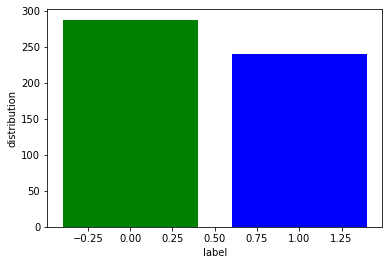

In [43]:
one = 0 
zero = 0

for i in Y_train1: 
    if i == 1:
        one+=1 
    else:
        zero+=1 

x = [1,0]
y = [one,zero]

plt.bar(x,y,color=['blue', 'g']) 
plt.xlabel('label') 
plt.ylabel('distribution')

## Algorithms Applied

## 1) Logistic Regression

training Logistic Regression Model
model trained
Accuracy:  71.21
R2 Score:  -0.16111111111111143

Model Evaluation Table: 
               precision    recall  f1-score   support

      Benign       0.69      0.86      0.77        72
   Malignant       0.76      0.53      0.63        60

    accuracy                           0.71       132
   macro avg       0.73      0.70      0.70       132
weighted avg       0.72      0.71      0.70       132

[[62 10]
 [28 32]]


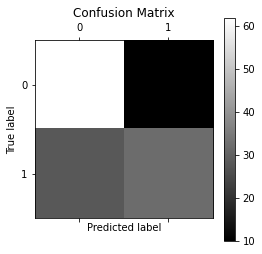

Specificity =  0.8611111111111112


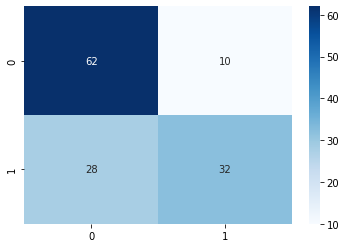

In [44]:
from sklearn.linear_model import LogisticRegression
print("training Logistic Regression Model")
model_1 = LogisticRegression()
model_1.fit(X_train1, Y_train1)
print("model trained")

# MODEL EVALUATION
target_names = ['Benign', 'Malignant']
# ACCURACY SCORE
Y_pred_1 = model_1.predict(X_test1)
logisticReg = accuracy_score(Y_pred_1, Y_test1)
print('Accuracy: ', round(logisticReg * 100, 2))
linear = r2_score(Y_test1,Y_pred_1)
print('R2 Score: ', linear)
model_eval = classification_report(Y_test1, Y_pred_1,target_names=target_names)
print('\nModel Evaluation Table: \n', model_eval)
cm = confusion_matrix(Y_test1, Y_pred_1)
print(cm)

# PLOT CONFUSION MATRIX
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# PLOT HEATMAP 
sns.heatmap(cm,cmap='Blues',annot=True,fmt='g')
cm_flat = cm.flatten()
TN = cm_flat[0]
FP = cm_flat[1]
FN = cm_flat[2]
TP = cm_flat[3]
recall = TP/(TP+FN)
precision =TP/(TP+FP)
specificity = TN/(TN+FP)
print('Specificity = ',specificity)

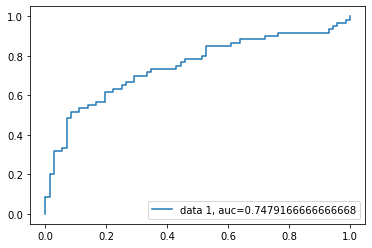

In [45]:
# AUC for Logistic Regression
from sklearn import metrics
y_pred_1 = model_1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test1,  y_pred_1)
auc = metrics.roc_auc_score(Y_test1, y_pred_1)
plt.plot(fpr,tpr,label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

## 2) Decision Tree

training Decision Tree Classifier Model
model trained
Accuracy:  65.15
R2 Score:  -0.4055555555555559

Model Evaluation Table: 
               precision    recall  f1-score   support

      Benign       0.67      0.72      0.69        72
   Malignant       0.63      0.57      0.60        60

    accuracy                           0.65       132
   macro avg       0.65      0.64      0.64       132
weighted avg       0.65      0.65      0.65       132

[[52 20]
 [26 34]]


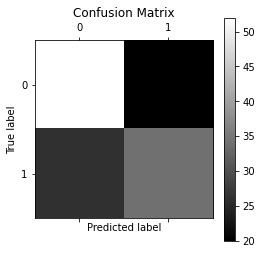

Specificity =  0.7222222222222222


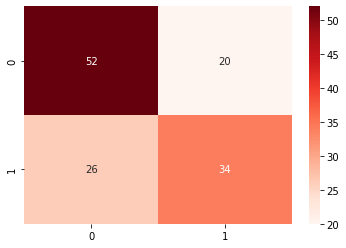

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
print("training Decision Tree Classifier Model")
model.fit(X_train1, Y_train1)
print("model trained")

# MODEL EVALUATION
target_names = ['Benign', 'Malignant']
# ACCURACY SCORE
xtest_pred = model.predict(X_test1)
DecisionT = accuracy_score(xtest_pred, Y_test1)
print('Accuracy: ', round(DecisionT * 100, 2))
linear = r2_score(Y_test1,xtest_pred)
print('R2 Score: ', linear)
model_eval = classification_report(Y_test1, xtest_pred ,target_names=target_names)
print('\nModel Evaluation Table: \n', model_eval)
cm = confusion_matrix(Y_test1, xtest_pred)
print(cm)

# PLOT CONFUSION MATRIX
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# PLOT HEATMAP 
sns.heatmap(cm,cmap='Reds',annot=True,fmt='g')
cm_flat = cm.flatten()
TN = cm_flat[0]
FP = cm_flat[1]
FN = cm_flat[2]
TP = cm_flat[3]
recall = TP/(TP+FN)
precision =TP/(TP+FP)
specificity = TN/(TN+FP)
print('Specificity = ',specificity)

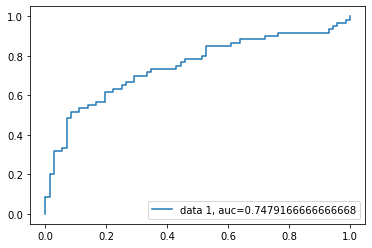

In [47]:
# AUC for Decision Tree
from sklearn import metrics
xtest_pred = model_1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test1,  xtest_pred)
auc = metrics.roc_auc_score(Y_test1, xtest_pred)
plt.plot(fpr,tpr,label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

## 3) Gaussian Naive Bayes Classifier

training Gaussian Model
model trained
Accuracy:  75.0
R2 Score:  -0.008333333333333526

Model Evaluation Table: 
               precision    recall  f1-score   support

      Benign       0.75      0.82      0.78        72
   Malignant       0.75      0.67      0.71        60

    accuracy                           0.75       132
   macro avg       0.75      0.74      0.74       132
weighted avg       0.75      0.75      0.75       132

[[59 13]
 [20 40]]


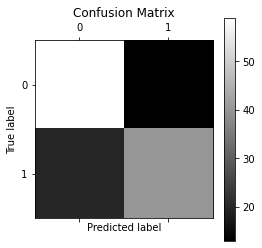

Specificity =  0.8194444444444444


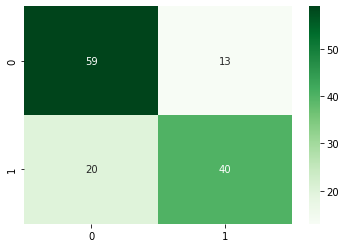

In [48]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
print("training Gaussian Model")
model.fit(X_train1, Y_train1)
print("model trained")

# MODEL EVALUATION
target_names = ['Benign', 'Malignant']
# ACCURACY SCORE
xtest_pred = model.predict(X_test1)
GaussianNB = accuracy_score(xtest_pred, Y_test1)
print('Accuracy: ', round(GaussianNB * 100, 2))
linear = r2_score(Y_test1,xtest_pred)
print('R2 Score: ', linear)
model_eval = classification_report(Y_test1, xtest_pred ,target_names=target_names)
print('\nModel Evaluation Table: \n', model_eval)
cm = confusion_matrix(Y_test1, xtest_pred)
print(cm)

# PLOT CONFUSION MATRIX
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# PLOT HEATMAP 
sns.heatmap(cm,cmap='Greens',annot=True,fmt='g')
cm_flat = cm.flatten()
TN = cm_flat[0]
FP = cm_flat[1]
FN = cm_flat[2]
TP = cm_flat[3]
recall = TP/(TP+FN)
precision =TP/(TP+FP)
specificity = TN/(TN+FP)
print('Specificity = ',specificity)

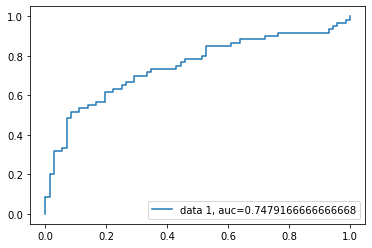

In [49]:
# AUC for Naive Bayes Classifier
from sklearn import metrics
xtest_pred = model_1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test1,  xtest_pred)
auc = metrics.roc_auc_score(Y_test1, xtest_pred)
plt.plot(fpr,tpr,label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

## 4) Random Forest Classifier

training random forest model
model trained
Accuracy:  70.45
R2 Score:  -0.19166666666666687

Model Evaluation Table: 
               precision    recall  f1-score   support

      Benign       0.69      0.82      0.75        72
   Malignant       0.72      0.57      0.64        60

    accuracy                           0.70       132
   macro avg       0.71      0.69      0.69       132
weighted avg       0.71      0.70      0.70       132

[[59 13]
 [26 34]]


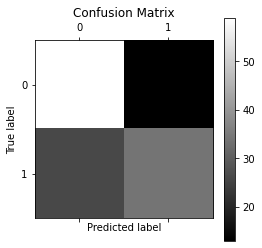

Specificity =  0.8194444444444444


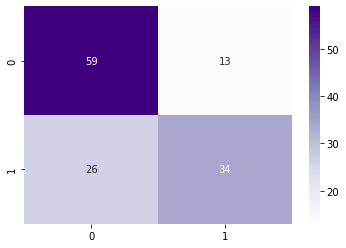

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=100, random_state=0)
print("training random forest model")
model.fit(X_train1, Y_train1)
print("model trained")

# MODEL EVALUATION
target_names = ['Benign', 'Malignant']
# ACCURACY SCORE
xtest_pred = model.predict(X_test1)
RandomF = accuracy_score(xtest_pred, Y_test1)
print('Accuracy: ', round(RandomF * 100, 2))
linear = r2_score(Y_test1,xtest_pred)
print('R2 Score: ', linear)
model_eval = classification_report(Y_test1, xtest_pred ,target_names=target_names)
print('\nModel Evaluation Table: \n', model_eval)
cm = confusion_matrix(Y_test1, xtest_pred)
print(cm)

# PLOT CONFUSION MATRIX
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# PLOT HEATMAP 
sns.heatmap(cm,cmap='Purples',annot=True,fmt='g')
cm_flat = cm.flatten()
TN = cm_flat[0]
FP = cm_flat[1]
FN = cm_flat[2]
TP = cm_flat[3]
recall = TP/(TP+FN)
precision =TP/(TP+FP)
specificity = TN/(TN+FP)
print('Specificity = ',specificity)

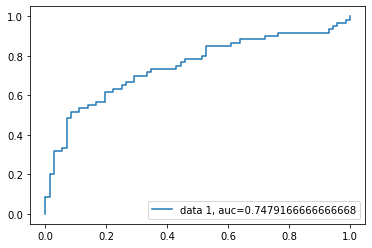

In [51]:
# AUC for Random Forest Classifier
from sklearn import metrics
xtest_pred = model_1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test1,  xtest_pred)
auc = metrics.roc_auc_score(Y_test1, xtest_pred)
plt.plot(fpr,tpr,label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

## 5) K Nearest Neighbor Classifier

training knn model
model trained
Accuracy:  54.55
R2 Score:  -0.8333333333333337

Model Evaluation Table: 
               precision    recall  f1-score   support

      Benign       0.55      1.00      0.71        72
   Malignant       0.00      0.00      0.00        60

    accuracy                           0.55       132
   macro avg       0.27      0.50      0.35       132
weighted avg       0.30      0.55      0.39       132

[[72  0]
 [60  0]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


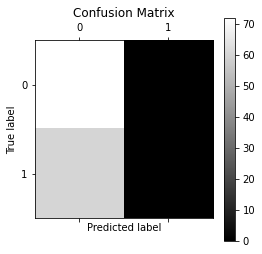

Specificity =  1.0


/var/folders/kv/9cymplv97pb6645dxkl_mgp80000gn/T/ipykernel_8585/3361439967.py:36: RuntimeWarning: invalid value encountered in long_scalars
  precision =TP/(TP+FP)


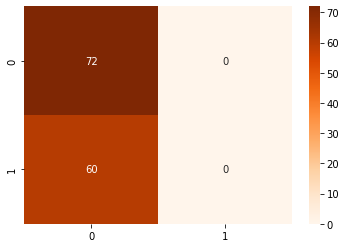

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=X_train1.shape[0])
print("training knn model")
model.fit(X_train1, Y_train1)
print("model trained")

# MODEL EVALUATION
target_names = ['Benign', 'Malignant']
# ACCURACY SCORE
xtest_pred = model.predict(X_test1)
KNN = accuracy_score(xtest_pred, Y_test1)
print('Accuracy: ', round(KNN * 100, 2))
linear = r2_score(Y_test1,xtest_pred)
print('R2 Score: ', linear)
model_eval = classification_report(Y_test1, xtest_pred ,target_names=target_names)
print('\nModel Evaluation Table: \n', model_eval)
cm = confusion_matrix(Y_test1, xtest_pred)
print(cm)

# PLOT CONFUSION MATRIX
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# PLOT HEATMAP 
sns.heatmap(cm,cmap='Oranges',annot=True,fmt='g')
cm_flat = cm.flatten()
TN = cm_flat[0]
FP = cm_flat[1]
FN = cm_flat[2]
TP = cm_flat[3]
recall = TP/(TP+FN)
precision =TP/(TP+FP)
specificity = TN/(TN+FP)
print('Specificity = ',specificity)

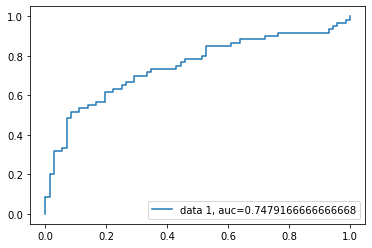

In [53]:
# AUC for K Nearest Classifier
from sklearn import metrics
xtest_pred = model_1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test1,  xtest_pred)
auc = metrics.roc_auc_score(Y_test1, xtest_pred)
plt.plot(fpr,tpr,label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

## 6) Support Vector Machine

training svm model
model trained
Accuracy:  68.18
R2 Score:  -0.28333333333333366

Model Evaluation Table: 
               precision    recall  f1-score   support

      Benign       0.66      0.86      0.75        72
   Malignant       0.74      0.47      0.57        60

    accuracy                           0.68       132
   macro avg       0.70      0.66      0.66       132
weighted avg       0.69      0.68      0.67       132

[[62 10]
 [32 28]]


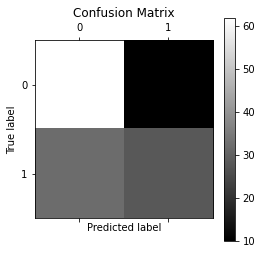

Specificity =  0.8611111111111112


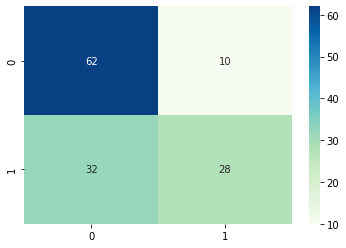

In [54]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
print("training svm model")
model = clf.fit(X_train1, Y_train1)
print("model trained")

# MODEL EVALUATION
target_names = ['Benign', 'Malignant']
# ACCURACY SCORE
xtest_pred = model.predict(X_test1)
SVM = accuracy_score(xtest_pred, Y_test1) 
print('Accuracy: ', round(SVM * 100, 2)) 
linear = r2_score(Y_test1,xtest_pred) 
print('R2 Score: ', linear)
model_eval = classification_report(Y_test1, xtest_pred ,target_names=target_names) 
print('\nModel Evaluation Table: \n', model_eval)
cm = confusion_matrix(Y_test1, xtest_pred)
print(cm)
                                   
# PLOT CONFUSION MATRIX
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
                                   
# PLOT HEATMAP
sns.heatmap(cm,cmap='GnBu',annot=True,fmt='g') 
cm_flat = cm.flatten()
TN = cm_flat[0]
FP = cm_flat[1]
FN = cm_flat[2]
TP = cm_flat[3]
recall = TP/(TP+FN)
precision =TP/(TP+FP)
specificity = TN/(TN+FP) 
print('Specificity = ',specificity)

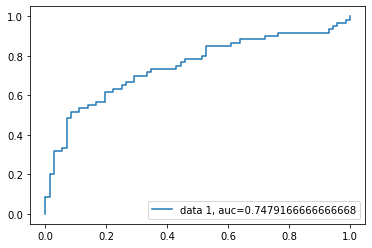

In [55]:
# AUC for SVM
from sklearn import metrics
xtest_pred = model_1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test1,  xtest_pred)
auc = metrics.roc_auc_score(Y_test1, xtest_pred)
plt.plot(fpr,tpr,label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

# Accuracy Bar Graph

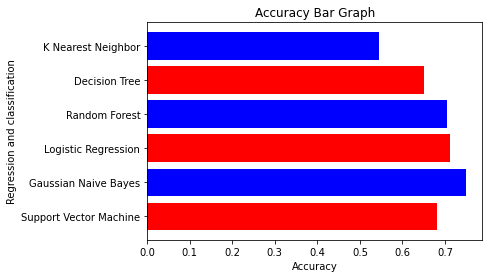

In [56]:
x = ['Support Vector Machine','Gaussian Naive Bayes','Logistic Regression','Random Forest','Decision Tree','K Nearest Neighbor']
y = [SVM,GaussianNB,logisticReg,RandomF,DecisionT,KNN]
plt.barh(x,y,color=['r','b'])
plt.xlabel('Accuracy')
plt.ylabel('Regression and classification')
plt.title('Accuracy Bar Graph')
plt.show()

## Boxplot for Algorithm Comparison

LR: 0.621212 (0.144854)
LDA: 0.539394 (0.087617)
KNN: 0.618182 (0.271529)
CART: 0.583333 (0.060321)
SVM: 0.668182 (0.148832)


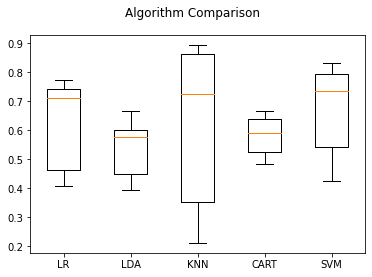

In [57]:
# prepare configuration for cross validation test harness
seed = None

# Prepare Models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_norm_pca, label, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## __________________________Thank you__________________________